<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
https://raw.githubusercontent.com/chrisalbon/sim_data/master/images/plane_256x256.jpg

SyntaxError: ignored

In [3]:
image = cv2.imread('plane_256x256.jpg',cv2.IMREAD_GRAYSCALE)

In [2]:
!wget https://raw.githubusercontent.com/chrisalbon/sim_data/master/images/plane_256x256.jpg

--2021-01-14 13:48:17--  https://raw.githubusercontent.com/chrisalbon/sim_data/master/images/plane_256x256.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22974 (22K) [image/jpeg]
Saving to: ‘plane_256x256.jpg’

plane_256x256.jpg   100%[===================>]  22.44K  --.-KB/s    in 0s      

2021-01-14 13:48:18 (107 MB/s) - ‘plane_256x256.jpg’ saved [22974/22974]



In [4]:
type(image)

numpy.ndarray

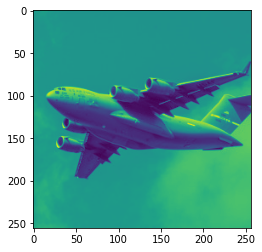

In [5]:
plt.imshow(image)

In [6]:
image = cv2.imread('plane_256x256.jpg',cv2.IMREAD_COLOR)

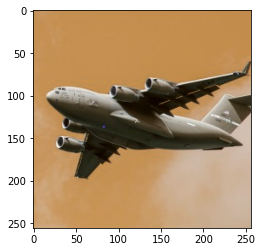

In [7]:
plt.imshow(image)

In [8]:
image = cv2.imread('plane_256x256.jpg',cv2.COLOR_BGR2RGB)

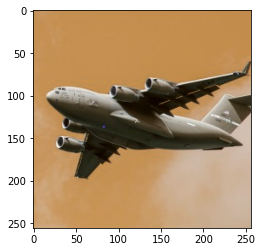

In [9]:
plt.imshow(image)

In [10]:
cv2.imwrite('airplane.jpg',image) #writing images

True

##Resizing

In [11]:
img_resize = cv2.resize(image,(50,50))

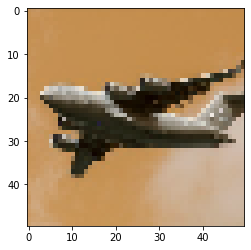

In [12]:
plt.imshow(img_resize)

##Cropping image

In [13]:
image_cropped = image[:,:128]

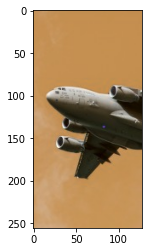

In [14]:
plt.imshow(image_cropped)

##Blurring image

In [15]:
blur_image = cv2.blur(image,(5,5))

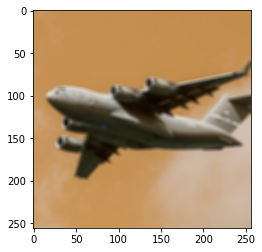

In [16]:
plt.imshow(blur_image)

In [17]:
sharp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [18]:
image_sharp = cv2.filter2D(image,-1,sharp_kernel)

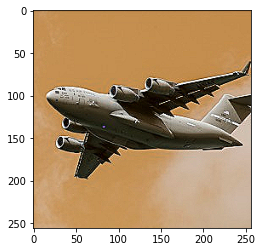

In [19]:
plt.imshow(image_sharp)

##Enchnacing contrast

In [20]:
image = cv2.imread('plane_256x256.jpg',0)

In [21]:
image_enhance = cv2.equalizeHist(image)

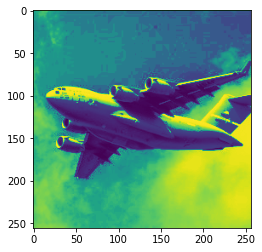

In [22]:
plt.imshow(image_enhance)

##Isolate colors

In [23]:
image = cv2.imread('plane_256x256.jpg')

In [24]:
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

In [25]:
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

In [26]:
mask = cv2.inRange(image_hsv,lower_blue,upper_blue)

(<matplotlib.image.AxesImage at 0x7f19683bf048>, (-0.5, 255.5, 255.5, -0.5))

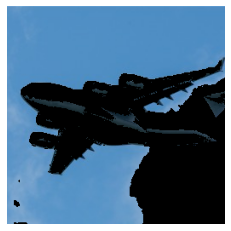

In [27]:
image_bgr_masked = cv2.bitwise_and(image, image, mask=mask)
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")

##Binarising images

In [28]:
max_output=255
neighbourhood_size=99
substract_from_mean=10

In [40]:
image = cv2.imread('plane_256x256.jpg',0)
image_binarised = cv2.adaptiveThreshold(image,max_output,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,neighbourhood_size,substract_from_mean)

In [41]:
type(image_binarised)

numpy.ndarray

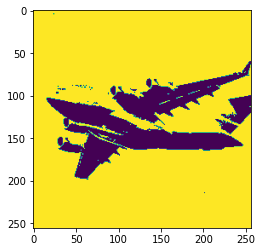

In [42]:
plt.imshow(image_binarised)

##Removing Backgrounds

In [43]:
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [49]:
rectangle = (0,56,256,150)

In [50]:
mask = np.zeros(image_rgb.shape[:2],np.uint8)

In [54]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [56]:
cv2.grabCut(img_rgb,mask,rectangle,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[4.30531556e-01, 9.02040648e-02, 1.43441948e-01, 2.18670287e-01,
         1.17152144e-01, 1.29671078e+02, 1.29671078e+02, 1.29671078e+02,
         1.65170353e+02, 1.65170353e+02, 1.65170353e+02, 1.46482576e+02,
         1.46482576e+02, 1.46482576e+02, 1.36324271e+02, 1.36324271e+02,
         1.36324271e+02, 1.76053556e+02, 1.76053556e+02, 1.76053556e+02,
         2.13870676e+00, 2.12870676e+00, 2.12870676e+00, 2.12870676e+00,
         2.13870676e+00, 2.12870676e+00, 2.12870676e+00, 2.12870676e+00,
         2.13870676e+00, 1.34936365e+01, 1.34836365e+01, 1.34836365e+01,
         1.34836365e+01, 1.34936365e+01, 1.34836365e+01, 1.34836365e+01,
         1.34836365e+01, 1.34936365e+01, 5.65407806e+01, 5.65307806e+01,
         5.65307806e+01, 5.65307806e+01, 5.6

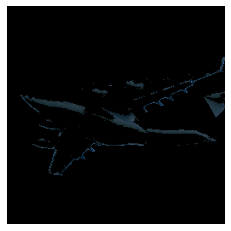

In [57]:
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

##Detecting edges

In [60]:
image = cv2.imread('plane_256x256.jpg',cv2.IMREAD_GRAYSCALE)

In [61]:
median_intensity = np.median(image)

In [62]:
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

In [64]:
canny_image = cv2.Canny(image,lower_threshold,upper_threshold)

(-0.5, 255.5, 255.5, -0.5)

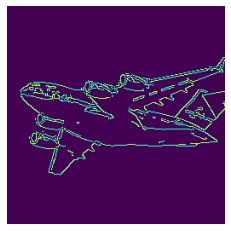

In [67]:
plt.imshow(canny_image)
plt.axis('off')